# Star Wars Survey
## Introduction
In this project, we're going to clean and explore a dataset of the Star Wars survey (July 2014). The data was collected by the [FiveThirtyEight](https://fivethirtyeight.com) team before the release of [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens), to answer the following question: **"does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**. For this investigation, 835 Star Wars fans were surveyed using the online tool SurveyMonkey. The results are available in [this dataset](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv), which we're going to download and use in our analysis.
### Summary of Results
We found out that **"Star Wars: Episode V The Empire Strikes Back" is indeed the highest-ranked and the most viewed of all, both overall and by different categories of people**. A general trend is that the original films are higher-ranked and were viewed by more people than those of the prequel trilogy.  
The following points were concluded from the analysis and visualization of the data: 
    - Men were more interested in the franchise than women.
    - People with income starting from 50,000$ were more interested than those who make less.

- Around a half of all the respondents have seen all the films, while around 1/4, have seen none of them.
- There's a strong correlation between being a fan of Star Wars and having seen all the films.
- Among the viewers, there are about 2/3 of fans of Star Wars.
- People who are familiar with the Expanded Universe, or are fans of Star Trek, tend to be also fans of Star Wars.
- The least familiar character is Padme Amidala, the most familiar – Luke Skywalker, the most favorite – Han Solo, the least favorite – Jar Jar Binks, the most controversial – Emperor Palpatine, the most non-indifferent – Darth Vader.
## Data Reading and Initial Exploration

In [1]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

star_wars = pd.read_csv(r'StarWars.csv' , encoding="ISO-8859-1")

In [20]:
pd.options.display.max_columns = None
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of th

___
Data Cleaning:
-
___

In [3]:
print(star_wars.shape)
star_wars.drop_duplicates().dropna(how='all')
print(star_wars.shape)
df = star_wars.copy()

(1187, 38)
(1187, 38)


___
Re-Ordering columns for more convenience:
___

In [4]:
df = df[['RespondentID', 'Gender', 'Age', 'Household Income', 'Education', 'Location (Census Region)', 'Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'Are you familiar with the Expanded Universe?', 'Do you consider yourself to be a fan of the Expanded Universe?\x8cæ', 'Do you consider yourself to be a fan of the Star Trek franchise?']]

In [5]:
sub_categories = df.loc[0].to_list()
df.loc[0] = np.NaN
df.dropna(how='all', inplace=True)

___
Converting Yes/No columns to boolean values:
___

In [6]:
to_boolean = {'Yes': True , 'No': False}
df.iloc[:,[6,7,35,36,37]] = df.iloc[:,[6,7,35,36,37]].apply(lambda x : x.replace(to_boolean))
df.head()

,RespondentID,Gender,Age,Household Income,Education,Location (Census Region),Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?
1,3.292880e+09,Male,18-29,NaN,High school degree,South Atlantic,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False
2,3.292880e+09,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,3.292765e+09,Male,18-29,"$0 - $24,999",High school degree,West North Central,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False
4,3.292763e+09,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True
5,3.292731e+09,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False


___
Renaming columns to better describe their values:
___

In [7]:
episodes = df.values[0][8:14]
dict = {}.fromkeys(episodes, True)
dict[np.NaN] = False
i = 1
for col in df.columns[8:14]:
    df[col] = df[col].map(dict)
    df.rename(columns={str(col):f'Seen_episode_{i}'}, inplace=True)
    i += 1

In [8]:
df.iloc[0,14:20] = np.NaN
df[df.columns[14:20]] = df[df.columns[14:20]].astype(float)
i = 1
for col in df.columns[14:20]:
    df.rename(columns={str(col):f'episode_{i}\'s_Rank'}, inplace=True)
    i += 1

In [9]:
for old,new in zip(df.columns[20:34] , sub_categories[20:34]):
    df.rename(columns={old:f'{new}\'s Favorability'}, inplace=True)
df.reset_index().head()

,index,RespondentID,Gender,Age,Household Income,Education,Location (Census Region),Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_episode_1,Seen_episode_2,Seen_episode_3,Seen_episode_4,Seen_episode_5,Seen_episode_6,episode_1's_Rank,episode_2's_Rank,episode_3's_Rank,episode_4's_Rank,episode_5's_Rank,episode_6's_Rank,Han Solo's Favorability,Luke Skywalker's Favorability,Princess Leia Organa's Favorability,Anakin Skywalker's Favorability,Obi Wan Kenobi's Favorability,Emperor Palpatine's Favorability,Darth Vader's Favorability,Lando Calrissian's Favorability,Boba Fett's Favorability,C-3P0's Favorability,R2 D2's Favorability,Jar Jar Binks's Favorability,Padme Amidala's Favorability,Yoda's Favorability,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?
0,1,3.292880e+09,Male,18-29,NaN,High school degree,South Atlantic,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False
1,2,3.292880e+09,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,3,3.292765e+09,Male,18-29,"$0 - $24,999",High school degree,West North Central,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False
3,4,3.292763e+09,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True
4,5,3.292731e+09,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False


___
Data Visualization & Analysis:
---
___

Average ranking per episode:
___

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "episode_1's_Rank"),
  Text(1, 0, "episode_2's_Rank"),
  Text(2, 0, "episode_3's_Rank"),
  Text(3, 0, "episode_4's_Rank"),
  Text(4, 0, "episode_5's_Rank"),
  Text(5, 0, "episode_6's_Rank")])

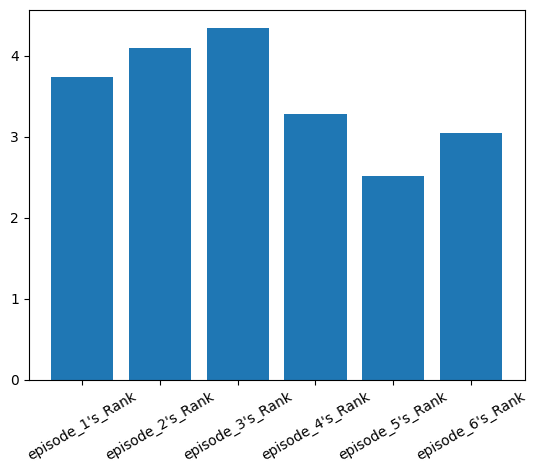

In [10]:
rank  = df.iloc[:,14:20].mean()
plt.bar(df.columns[14:20] , rank)
plt.xticks(rotation=30)

___
Total views per episode:
___

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Seen_episode_1'),
  Text(1, 0, 'Seen_episode_2'),
  Text(2, 0, 'Seen_episode_3'),
  Text(3, 0, 'Seen_episode_4'),
  Text(4, 0, 'Seen_episode_5'),
  Text(5, 0, 'Seen_episode_6')])

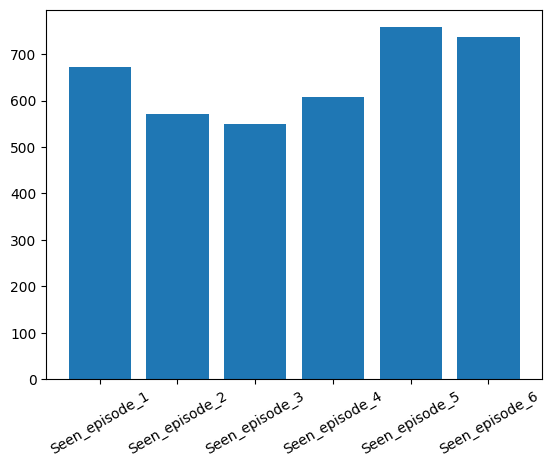

In [11]:
views = df.iloc[:,8:14].sum()
plt.bar(df.columns[8:14] , views)
plt.xticks(rotation=30)

It seems that chapters 5 & 6 were the most watched, however, they were ranked the lowest, that may be because they were highly anticipated to be even better that the ones before, which apparently wasn't the case according to the survay participants.

___
Average Ranking (Females Vs Males):
___

In [12]:
males = df[df.Gender == 'Male']
females = df[df.Gender == 'Female']

C:\Temp\ipykernel_1760\3000881875.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.columns[14:20], rotation=30, size=8)
C:\Temp\ipykernel_1760\3000881875.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


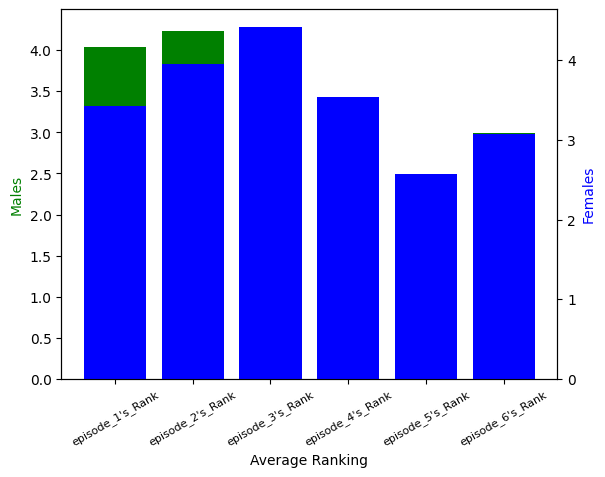

In [13]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df.columns[14:20] , males.iloc[: , 14:20].mean() , color='g')
ax2.bar(df.columns[14:20] , females.iloc[: , 14:20].mean() , color='b')

ax1.set_xlabel('Average Ranking')
ax1.set_ylabel('Males', color='g')
ax2.set_ylabel('Females', color='b')
ax1.set_xticklabels(df.columns[14:20], rotation=30, size=8)

fig.show()

___
StarWars Vs StarTrek popularity analysis:
___

In [14]:
SW_vs_ST = df.iloc[:,[7,37]]
SW_vs_ST.dropna(inplace=True)

C:\Temp\ipykernel_1760\2735862994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SW_vs_ST.dropna(inplace=True)


In [15]:
SW_vs_ST.value_counts(normalize=True).to_frame()

,,0
Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Star Trek franchise?,
True,True,0.446860
False,False,0.287440
True,False,0.211353
False,True,0.054348


From the previous analysis we can see that 44% of the participants who were fans of StarWars, were also fans of StarTrek, while 21% didn't find StarTrek movies to be as good as StarWars.



___
Characters' favorability analysis:
___

In [16]:
characters = df.iloc[:,20:34]
l = []
for c in range(len(characters.columns)):
    l.append(characters.iloc[:,c].value_counts())

In [17]:
most_fav = []
for i in l:
    most_fav.append([f'{i.name} - Most', i[0]])
most_fav.sort(key=(lambda x :x[1]), reverse=True)
most_fav

[["Han Solo's Favorability - Most", 610],
 ["Yoda's Favorability - Most", 605],
 ["Obi Wan Kenobi's Favorability - Most", 591],
 ["R2 D2's Favorability - Most", 562],
 ["Luke Skywalker's Favorability - Most", 552],
 ["Princess Leia Organa's Favorability - Most", 547],
 ["C-3P0's Favorability - Most", 474],
 ["Darth Vader's Favorability - Most", 310],
 ["Anakin Skywalker's Favorability - Most", 269],
 ["Boba Fett's Favorability - Most", 248],
 ["Lando Calrissian's Favorability - Most", 236],
 ["Emperor Palpatine's Favorability - Most", 213],
 ["Padme Amidala's Favorability - Most", 207],
 ["Jar Jar Binks's Favorability - Most", 204]]

In [18]:
least_fav = []
for i in l:
    least_fav.append([f'{i.name} - Least', i[5]])
least_fav.sort(key=(lambda x :x[1]), reverse=True)
least_fav

[["Jar Jar Binks's Favorability - Least", 102],
 ["Emperor Palpatine's Favorability - Least", 68],
 ["Boba Fett's Favorability - Least", 45],
 ["Anakin Skywalker's Favorability - Least", 39],
 ["Padme Amidala's Favorability - Least", 34],
 ["Darth Vader's Favorability - Least", 10],
 ["Lando Calrissian's Favorability - Least", 8],
 ["Yoda's Favorability - Least", 8],
 ["Obi Wan Kenobi's Favorability - Least", 7],
 ["C-3P0's Favorability - Least", 7],
 ["Princess Leia Organa's Favorability - Least", 6],
 ["R2 D2's Favorability - Least", 6],
 ["Luke Skywalker's Favorability - Least", 3],
 ["Han Solo's Favorability - Least", 1]]

In [19]:
controversial = []
for i in l:
    controversial.append([f'{i.name} - Controversial', i[2]])
controversial.sort(key=(lambda x :x[1]), reverse=True)
controversial

[["Padme Amidala's Favorability - Controversial", 168],
 ["Darth Vader's Favorability - Controversial", 149],
 ["Lando Calrissian's Favorability - Controversial", 148],
 ["Emperor Palpatine's Favorability - Controversial", 143],
 ["Boba Fett's Favorability - Controversial", 138],
 ["Anakin Skywalker's Favorability - Controversial", 135],
 ["Jar Jar Binks's Favorability - Controversial", 130],
 ["C-3P0's Favorability - Controversial", 79],
 ["R2 D2's Favorability - Controversial", 57],
 ["Yoda's Favorability - Controversial", 51],
 ["Princess Leia Organa's Favorability - Controversial", 48],
 ["Han Solo's Favorability - Controversial", 44],
 ["Obi Wan Kenobi's Favorability - Controversial", 43],
 ["Luke Skywalker's Favorability - Controversial", 38]]

From the above analyis, we can see that:
- The most favorable character was "Han Solo".
- The most unfavorable character was "Jar Jar Binks".
- The most controversial character was "Padme Amidala".
___